## Data collection

In [ ]:
!pip install gdown
!gdown --id 1OnwRzF8h88bxX-aNVU_L4p0-jzMbHFUn

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1OnwRzF8h88bxX-aNVU_L4p0-jzMbHFUn
From (redirected): https://drive.google.com/uc?id=1OnwRzF8h88bxX-aNVU_L4p0-jzMbHFUn&confirm=t&uuid=60414909-c1e1-49b7-a281-9c6d3c5b3749
To: /content/datasetMA.zip
100% 4.41G/4.41G [01:09<00:00, 63.4MB/s]


In [ ]:
import zipfile

# Get the path to the .zip file on your Google Drive.
zip_path = '/content/datasetMA.zip'

# Open the .zip file.
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Extract all the files in the .zip file to the current directory.
    zip_ref.extractall()

In [ ]:
!ls
!cd datasetMA/
!ls

datasetMA  datasetMA.zip  sample_data
datasetMA  datasetMA.zip  sample_data


In [ ]:
!head -20 /content/datasetMA/fulltrainMA.txt

1 ഇരുന്ന
2 പ്രത്യേകിച്ചും
3 ഖനന
4 ഫ്രണ്ടിനെതിരെ
5 സുഗതകുമാരിയുടെ
6 ഹോം
7 മധുസൂദനന്റെ
8 അപ്പുറത്തുള്ള
9 ജസ്റ്റിസും
10 ഒഴിഞ്ഞുമാറുകയായിരുന്നു
11 വധശിക്ഷ
12 ഏലൂരിലെ
13 വിഘടിപ്പിച്ച്
14 കെസിബിസി
15 ഗൂഢാലോചനയും
16 തുടങ്ങും-മുഖ്യമന്ത്രി
17 ഖണ്ഡിക്കാനാണ്
18 വിചേ്ഛദിക്കാനല്ല
19 ൩൨
20 ഊഹിക്കാമല്ലോ


## Imports

In [ ]:
from tensorflow.keras.layers import StringLookup
from tensorflow import keras

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os

np.random.seed(42)
tf.random.set_seed(42)

## Dataset splitting

In [ ]:
base_path = "datasetMA"
words_list = []

words = open(f"{base_path}/fulltrainMA.txt", "r").readlines()
for line in words:
    if line[0] == "#":
        continue
    if line.split(" ")[1] != "err":  # We don't need to deal with errored entries.
        words_list.append(line.rstrip('\n'))

print(len(words_list))

np.random.shuffle(words_list)
words_list[:10]


85260


['39908 തീവണ്ടിയെ',
 '53224 ഭഗവതിക്ഷേത്രത്തിലെ',
 '21773 മാറിടം',
 '24017 വിളിച്ചത്',
 '43827 വികലാംഗരേഖയും',
 '78794 ജനസംഖ്യാ',
 '43588 വോട്ടിനുവേണ്ടി',
 '66807 കോയമ്പത്തൂരിലും',
 '61595 സങ്കേതമാണ്',
 '85303 വണ്ടികയറും']

90:5:5 ratio (train:validation:test).

In [ ]:
split_idx = int(0.9 * len(words_list))
train_samples = words_list[:split_idx]
test_samples = words_list[split_idx:]

val_split_idx = int(0.5 * len(test_samples))
validation_samples = test_samples[:val_split_idx]
test_samples = test_samples[val_split_idx:]

assert len(words_list) == len(train_samples) + len(validation_samples) + len(
    test_samples
)

print(f"Total training samples: {len(train_samples)}")
print(f"Total validation samples: {len(validation_samples)}")
print(f"Total test samples: {len(test_samples)}")

Total training samples: 76734
Total validation samples: 4263
Total test samples: 4263


## Data input pipeline


In [ ]:
base_image_path = os.path.join(base_path, "train")


def get_image_paths_and_labels(samples):
    paths = []
    corrected_samples = []
    for (i, file_line) in enumerate(samples):
        line_split = file_line.strip()
        line_split = line_split.split(" ")
        #print(line_split)
        name = line_split[0] + ".jpg"
        label = line_split[1]
        #paths.append(name)
        #corrected_samples.append(label)
        # Each line split will have this format for the corresponding image:
        # part1/part1-part2/part1-part2-part3.png
        # image_name = line_split[0]
        # partI = image_name.split("-")[0]
        # partII = image_name.split("-")[1]
        # img_path = os.path.join(
        #     base_image_path, partI, partI + "-" + partII, image_name + ".png"
        # )
        #if os.path.getsize(name):
        paths.append(str("datasetMA/train/"+str(name)))
        #paths.append(name)
        corrected_samples.append(label)

    return paths, corrected_samples


train_img_paths, train_labels = get_image_paths_and_labels(train_samples)
print(train_img_paths[:10], train_labels[:10])
validation_img_paths, validation_labels = get_image_paths_and_labels(validation_samples)
test_img_paths, test_labels = get_image_paths_and_labels(test_samples)

['datasetMA/train/39908.jpg', 'datasetMA/train/53224.jpg', 'datasetMA/train/21773.jpg', 'datasetMA/train/24017.jpg', 'datasetMA/train/43827.jpg', 'datasetMA/train/78794.jpg', 'datasetMA/train/43588.jpg', 'datasetMA/train/66807.jpg', 'datasetMA/train/61595.jpg', 'datasetMA/train/85303.jpg'] ['തീവണ്ടിയെ', 'ഭഗവതിക്ഷേത്രത്തിലെ', 'മാറിടം', 'വിളിച്ചത്', 'വികലാംഗരേഖയും', 'ജനസംഖ്യാ', 'വോട്ടിനുവേണ്ടി', 'കോയമ്പത്തൂരിലും', 'സങ്കേതമാണ്', 'വണ്ടികയറും']


In [ ]:
# Find maximum length and the size of the vocabulary in the training data.
train_labels_cleaned = []
characters = set()
max_len = 0
import re


for label in train_labels:
    #label = label.split(" ")[-1].strip()
    for char in label:
        characters.add(char)

    max_len = max(max_len, len(label))
    train_labels_cleaned.append(label)

characters = [x for x in sorted(list(characters)) if not x.isdigit()]

#max_len = 32
print("Maximum length: ", max_len)
print("Vocab size: ", len(characters))
print(characters)
# Check some label samples.
train_labels_cleaned[:10]

Maximum length:  41
Vocab size:  85
['-', 'ം', 'ഃ', 'അ', 'ആ', 'ഇ', 'ഈ', 'ഉ', 'ഊ', 'ഋ', 'ഌ', 'എ', 'ഏ', 'ഐ', 'ഒ', 'ഓ', 'ഔ', 'ക', 'ഖ', 'ഗ', 'ഘ', 'ങ', 'ച', 'ഛ', 'ജ', 'ഝ', 'ഞ', 'ട', 'ഠ', 'ഡ', 'ഢ', 'ണ', 'ത', 'ഥ', 'ദ', 'ധ', 'ന', 'പ', 'ഫ', 'ബ', 'ഭ', 'മ', 'യ', 'ര', 'റ', 'ല', 'ള', 'ഴ', 'വ', 'ശ', 'ഷ', 'സ', 'ഹ', 'ാ', 'ി', 'ീ', 'ു', 'ൂ', 'ൃ', 'ൄ', 'െ', 'േ', 'ൈ', 'ൊ', 'ോ', 'ൌ', '്', 'ൗ', 'ൠ', 'ൡ', 'ൢ', 'ൣ', '൰', '൱', '൲', '൳', '൴', '൵', '൹', 'ൺ', 'ൻ', 'ർ', 'ൽ', 'ൾ', 'ൿ']


['തീവണ്ടിയെ',
 'ഭഗവതിക്ഷേത്രത്തിലെ',
 'മാറിടം',
 'വിളിച്ചത്',
 'വികലാംഗരേഖയും',
 'ജനസംഖ്യാ',
 'വോട്ടിനുവേണ്ടി',
 'കോയമ്പത്തൂരിലും',
 'സങ്കേതമാണ്',
 'വണ്ടികയറും']

In [ ]:

def clean_labels(labels):
    cleaned_labels = []
    for label in labels:
        #label = label.split(" ")[-1].strip()
        cleaned_labels.append(label)
    return cleaned_labels


validation_labels_cleaned = clean_labels(validation_labels)
test_labels_cleaned = clean_labels(test_labels)
print(test_labels_cleaned)

['നന്മയുടെ', 'എസ്സിനെ', 'മുനമ്പിനുമിടയിലുള്ള', 'ധരിച്ചുതുടങ്ങി', 'വിറ്റഴിക്കുന്ന', 'കൊല്ലങ്കോട്', 'ദൃശ്യവിസ്മയം', 'കരിനിഴലാണ്', 'വിദേശത്ത്', 'ഗുരുവുമായ', 'പശ്ചാത്തലമുള്ളവരുമായി', 'നിലനിന്നു', 'അദ്ദേഹം', 'സോണി', 'നിലവിലില്ല', 'വന്യജീവി', 'കായംകുളത്തെ', 'സൈറ്റായി', 'വന്നുവെങ്കിലും', 'പൈനാടി', 'തട്ടിപ്പിനിരയായ', 'തിരക്കിട്ട', 'പറ്റില്ല', 'റനീഫ്', 'അധ്യക്ഷനാകും', 'നിഷേധിച്ചത്', 'ആണുള്ളത്', 'തോന്ന്യാസം', 'കാണപ്പെടുന്ന', 'മെരുക്കി', 'നടക്കുകയാണ്', 'ഉത്പന്നങ്ങളിലൊന്നാണ്', 'ഭദ്രദീപം', 'വീണും', 'കടന്ന', 'കൂട്ടിന്', 'വൈകുന്നേരമായി', 'സാക്ഷിയായ', 'മോഡലിന്', 'സാക്ഷി', 'റിവീലിങ്', 'എന്നിവയാണ്', 'കാര്യക്ഷമതയില്ലാതെ', 'വീടലങ്കരിക്കുന്നതും', 'കൊടുക്കേണ്ടതില്ല', 'ഭീഷണിയാണ്', 'ശേഷവും', 'ജനങ്ങളേയും', 'രണ്ടുദിവസത്തിനിടെ', 'അടക്കം', 'തീരുമാനിക്കേണ്ടതെന്നും', 'പ്രചാരണംനടത്തുകയാണ്', 'സെല്ലുകളുടെ', 'പീഡനത്തെക്കുറിച്ച്', 'ആത്മഹത്യയ്ക്കു', 'മറ്റൊരാളെ', 'യാത്രക്കാരിയായ', 'ഒന്നാംസ്ഥാനം', 'കൊല്ലപ്പെട്ടു', 'അതറിഞ്ഞ', 'യുവജനസമ്മേളനം', 'അത്രക്ക്', 'ഓപ്പറേഷനിലൂടെ', 'ഇവയടങ്ങുന്ന', 'സാഹായിക്കുന്ന', 'സാധ്യമാകുന്ന', 'മുല്

### Building the character vocabulary



In [ ]:

AUTOTUNE = tf.data.AUTOTUNE

# Mapping characters to integers.
char_to_num = StringLookup(vocabulary=list(characters), mask_token=None)

# Mapping integers back to original characters.
num_to_char = StringLookup(
    vocabulary=char_to_num.get_vocabulary(), mask_token=None, invert=True
)

### Resizing images without distortion



In [ ]:

def distortion_free_resize(image, img_size):
    w, h = img_size
    image = tf.image.resize(image, size=(h, w), preserve_aspect_ratio=True)

    # Check tha amount of padding needed to be done.
    pad_height = h - tf.shape(image)[0]
    pad_width = w - tf.shape(image)[1]

    # Only necessary if you want to do same amount of padding on both sides.
    if pad_height % 2 != 0:
        height = pad_height // 2
        pad_height_top = height + 1
        pad_height_bottom = height
    else:
        pad_height_top = pad_height_bottom = pad_height // 2

    if pad_width % 2 != 0:
        width = pad_width // 2
        pad_width_left = width + 1
        pad_width_right = width
    else:
        pad_width_left = pad_width_right = pad_width // 2

    image = tf.pad(
        image,
        paddings=[
            [pad_height_top, pad_height_bottom],
            [pad_width_left, pad_width_right],
            [0, 0],
        ],
    )

    image = tf.transpose(image, perm=[1, 0, 2])
    image = tf.image.flip_left_right(image)
    return image


In [ ]:
batch_size = 64
padding_token = 99
image_width = 128
image_height = 32


def preprocess_image(image_path, img_size=(image_width, image_height)):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, 1)
    image = distortion_free_resize(image, img_size)
    image = tf.cast(image, tf.float32) / 255.0
    return image


def vectorize_label(label):
    label = char_to_num(tf.strings.unicode_split(label, input_encoding="UTF-8"))
    length = tf.shape(label)[0]
    pad_amount = max_len - length
    label = tf.pad(label, paddings=[[0, pad_amount]], constant_values=padding_token)
    return label


def process_images_labels(image_path, label):
    image = preprocess_image(image_path)
    label = vectorize_label(label)
    return {"image": image, "label": label}


def prepare_dataset(image_paths, labels):
    dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels)).map(
        process_images_labels, num_parallel_calls=AUTOTUNE
    )
    return dataset.batch(batch_size).cache().prefetch(AUTOTUNE)


print(train_img_paths[3450])

# print(train_img_paths[3450])
print(train_labels_cleaned[3450])
print(vectorize_label("പെടാപ്പാടുപെടുന്നത്"))

datasetMA/train/74051.jpg
പെടാപ്പാടുപെടുന്നത്
tf.Tensor(
[38 61 28 54 38 67 38 54 28 57 38 61 28 57 37 67 37 33 67 99 99 99 99 99
 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99 99], shape=(41,), dtype=int64)


## Prepare `tf.data.Dataset` objects

In [ ]:
train_ds = prepare_dataset(train_img_paths, train_labels_cleaned)
validation_ds = prepare_dataset(validation_img_paths, validation_labels_cleaned)
test_ds = prepare_dataset(test_img_paths, test_labels_cleaned)


In [ ]:
train_ds

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(None, None, None, 1), dtype=tf.float32, name=None), 'label': TensorSpec(shape=(None, None), dtype=tf.int64, name=None)}>

## Visualize a few samples

തീവണ്ടിയെ
ഭഗവതിക്ഷേത്രത്തിലെ
മാറിടം
വിളിച്ചത്
വികലാംഗരേഖയും
ജനസംഖ്യാ
വോട്ടിനുവേണ്ടി
കോയമ്പത്തൂരിലും
സങ്കേതമാണ്
വണ്ടികയറും
ഉത്പന്നങ്ങളിലൊന്നാണ്
പ്രതിഷേധവുമായി
കോടിയേരിയുടെ
സംഭവത്തിനു
പഞ്ചസാര
പുലിഗാംഭീര്യമുണ്ടാക്കി


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3364 (\N{MALAYALAM LETTER TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Malayalam natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3392 (\N{MALAYALAM VOWEL SIGN II}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3381 (\N{MALAYALAM LETTER VA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3363 (\N{MALAYALAM LETTER NNA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPytho

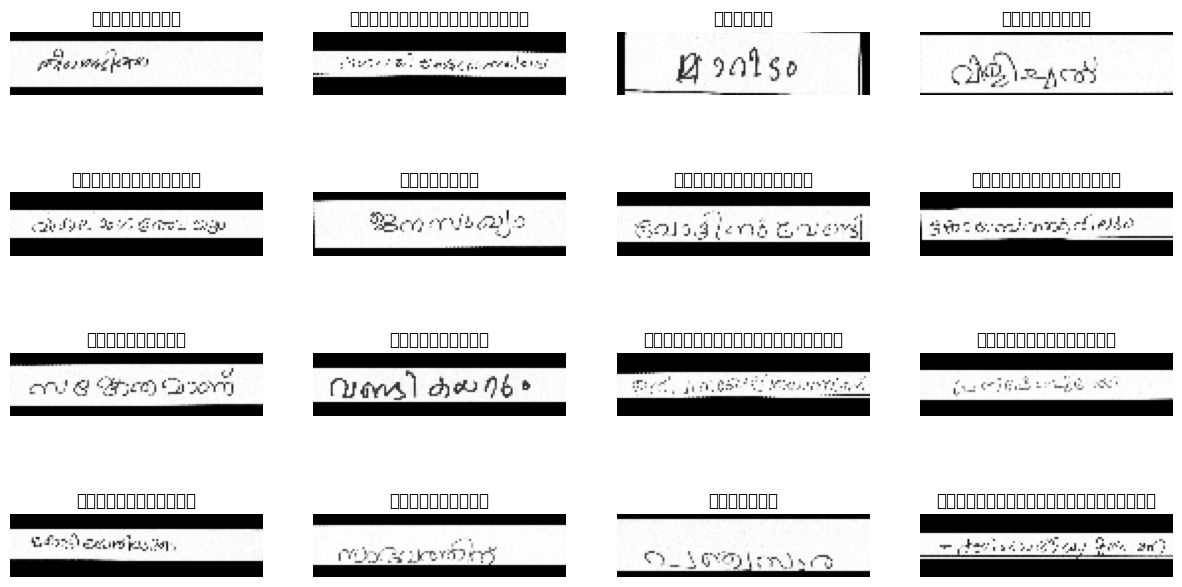

In [ ]:
for data in train_ds.take(1):
    images, labels = data["image"], data["label"]

    _, ax = plt.subplots(4, 4, figsize=(15, 8))

    for i in range(16):
        img = images[i]
        img = tf.image.flip_left_right(img)
        img = tf.transpose(img, perm=[1, 0, 2])
        img = (img * 255.0).numpy().clip(0, 255).astype(np.uint8)
        img = img[:, :, 0]

        # Gather indices where label!= padding_token.
        label = labels[i]
        indices = tf.gather(label, tf.where(tf.math.not_equal(label, padding_token)))
        # Convert to string.
        label = tf.strings.reduce_join(num_to_char(indices))
        label = label.numpy().decode("utf-8")

        ax[i // 4, i % 4].imshow(img, cmap="gray")
        ax[i // 4, i % 4].set_title(label)
        ax[i // 4, i % 4].axis("off")
        print(label)

plt.show()

In [ ]:
!ls -l {train_ds.file_pattern}

ls: cannot access '{train_ds.file_pattern}': No such file or directory


You will notice that the content of original image is kept as faithful as possible and has
been padded accordingly.

## Model

Our model will use the CTC loss as an endpoint layer. For a detailed understanding of the
CTC loss, refer to [this post](https://distill.pub/2017/ctc/).

In [ ]:

class CTCLayer(keras.layers.Layer):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.loss_fn = keras.backend.ctc_batch_cost

    def call(self, y_true, y_pred):
        batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
        input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
        label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")
        #if tf.cast(tf.shape(y_true)[1], dtype="int64")[1]>input_length:
        y_true = y_true[:,:input_length]
        # max_label_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
        # if max_label_length - label_length > 0:
        #     y_true = tf.pad(y_true, [[0, 0], [0, max_label_length - label_length]])

        input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
        label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")
        loss = self.loss_fn(y_true, y_pred, input_length, label_length)
        self.add_loss(loss)
        #ignore_longer_outputs_than_inputs=True
        # At test time, just return the computed predictions.
        return y_pred


def build_model():
    # Inputs to the model
    input_img = keras.Input(shape=(image_width, image_height, 1), name="image")
    labels = keras.layers.Input(name="label", shape=(None,))

    # First conv block.
    x = keras.layers.Conv2D(
        32,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv1",
    )(input_img)
    x = keras.layers.MaxPooling2D((2, 2), name="pool1")(x)

    # Second conv block.
    x = keras.layers.Conv2D(
        64,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv2",
    )(x)
    x = keras.layers.MaxPooling2D((2, 2), name="pool2")(x)

    # We have used two max pool with pool size and strides 2.
    # Hence, downsampled feature maps are 4x smaller. The number of
    # filters in the last layer is 64. Reshape accordingly before
    # passing the output to the RNN part of the model.
    new_shape = ((image_width // 4), (image_height // 4) * 64)
    x = keras.layers.Reshape(target_shape=new_shape, name="reshape")(x)
    x = keras.layers.Dense(64, activation="relu", name="dense1")(x)
    x = keras.layers.Dropout(0.2)(x)

    # RNNs.
    x = keras.layers.Bidirectional(
        keras.layers.LSTM(128, return_sequences=True, dropout=0.25)
    )(x)
    x = keras.layers.Bidirectional(
        keras.layers.LSTM(64, return_sequences=True, dropout=0.25)
    )(x)

    # +2 is to account for the two special tokens introduced by the CTC loss.
    # The recommendation comes here: https://git.io/J0eXP.
    x = keras.layers.Dense(
        len(char_to_num.get_vocabulary()) + 5, activation="softmax", name="dense2"
    )(x)

    # Add CTC layer for calculating CTC loss at each step.
    output = CTCLayer(name="ctc_loss")(labels, x)

    # Define the model.
    model = keras.models.Model(
        inputs=[input_img, labels], outputs=output, name="handwriting_recognizer"
    )
    # Optimizer.
    opt = keras.optimizers.Adam(learning_rate = 0.001)
    # Compile the model and return.
    model.compile(optimizer=opt)
    return model


# Get the model.
model = build_model()
model.summary()

Model: "handwriting_recognizer"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 image (InputLayer)          [(None, 128, 32, 1)]         0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 128, 32, 32)          320       ['image[0][0]']               
                                                                                                  
 pool1 (MaxPooling2D)        (None, 64, 16, 32)           0         ['Conv1[0][0]']               
                                                                                                  
 Conv2 (Conv2D)              (None, 64, 16, 64)           18496     ['pool1[0][0]']               
                                                                             

## Evaluation metrics

In [ ]:
validation_images = []
validation_labels = []

for batch in validation_ds:
    validation_images.append(batch["image"])
    validation_labels.append(batch["label"])

Now, we create a callback to monitor the edit distances.

In [ ]:

def calculate_edit_distance(labels, predictions):
    # Get a single batch and convert its labels to sparse tensors.
    saprse_labels = tf.cast(tf.sparse.from_dense(labels), dtype=tf.int64)

    # Make predictions and convert them to sparse tensors.
    input_len = np.ones(predictions.shape[0]) * predictions.shape[1]
    predictions_decoded = keras.backend.ctc_decode(
        predictions, input_length=input_len, greedy=True
    )[0][0][:, :max_len]
    sparse_predictions = tf.cast(
        tf.sparse.from_dense(predictions_decoded), dtype=tf.int64
    )

    # Compute individual edit distances and average them out.
    edit_distances = tf.edit_distance(
        sparse_predictions, saprse_labels, normalize=False
    )
    return tf.reduce_mean(edit_distances)


class EditDistanceCallback(keras.callbacks.Callback):
    def __init__(self, pred_model):
        super().__init__()
        self.prediction_model = pred_model

    def on_epoch_end(self, epoch, logs=None):
        edit_distances = []

        for i in range(len(validation_images)):
            labels = validation_labels[i]
            predictions = self.prediction_model.predict(validation_images[i])
            edit_distances.append(calculate_edit_distance(labels, predictions).numpy())

        print(
            f"Mean edit distance for epoch {epoch + 1}: {np.mean(edit_distances):.4f}"
        )


## Training

Now we are ready to kick off model training.

In [ ]:
epochs = 5  # To get good results this should be at least 50.

model = build_model()
prediction_model = keras.models.Model(
    model.get_layer(name="image").input, model.get_layer(name="dense2").output
)
edit_distance_callback = EditDistanceCallback(prediction_model)

# Train the model.
history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=epochs,
    callbacks=[edit_distance_callback],

)


Epoch 1/5
2/2 [==============================] - 2s 163ms/step
Mean edit distance for epoch 1: 38.8863
1199/1199 [==============================] - 212s 162ms/step - loss: 36.1612 - val_loss: 33.7440
Epoch 2/5
2/2 [==============================] - 0s 15ms/step
Mean edit distance for epoch 2: 38.5984
1199/1199 [==============================] - 80s 67ms/step - loss: 32.8974 - val_loss: 32.5474
Epoch 3/5
2/2 [==============================] - 0s 10ms/step
Mean edit distance for epoch 3: 38.6503
1199/1199 [==============================] - 80s 67ms/step - loss: 32.6399 - val_loss: 32.3820
Epoch 4/5
2/2 [==============================] - 0s 13ms/step
Mean edit distance for epoch 4: 38.0487
1199/1199 [==============================] - 80s 67ms/step - loss: 32.0545 - val_loss: 30.5257
Epoch 5/5
2/2 [==============================] - 0s 9ms/step
Mean edit distance for epoch 5: 37.4240
1199/1199 [==============================] - 83s 69ms/step - loss: 29.6195 - val_loss: 27.8569


## Inference

2/2 [==============================] - 0s 9ms/step
['സമയാട', 'പരിനന', 'കനതകകകക്കുള്ള', 'മരികകമായി', 'വികികുന്ന', 'അരകകകായ്', 'വികകികിയും', 'മനിികികുന്ണ്', 'വികനാണ്', 'മരകകാട', 'കര്തകകകികികുകെനാണ്', 'വിടിന്െ', 'മരമത', 'അനതി', 'വികകികിച്ച', 'സരിിയി', 'കരകകുകുന്ന', 'അരമായി', 'അനക്കിലും', 'അനായി', 'പരിതിതികിയും', 'വിടിച്ച', 'പടിിച്ച', 'സിന', 'അര്കകകയും', 'വിലികിക്ട്', 'അനകക്ടി', 'കനകയാ', 'കനകയുട', 'അരക്ടി', 'സുട്കുകുന്ണ്', 'കനകകികികുന്ന്ണ്', 'മലിയ', 'നിനതും', 'മന', 'കട്്', 'അരപപമായി', 'സരിികക്ടെ', 'കരയ്റ്', 'പരയി', 'വിരിക്റ്', 'പനതിക്കന്ണ്', 'കരതതികിനിന്ന', 'വിരകികന്നയും', 'സരതതത്തില', 'കിരികന്ത്', 'കരയും', 'കനങളും', 'സരതതത്തിന്നെ', 'ആടകും', 'വിരിതികികകന്നിയും', 'പരിതകകികികികുയാട്', 'അര്ികികളുട', 'പരിതതതനതായി', 'സരകക്കിലും', 'വടള്ള', 'സരകികിയായ്', 'കനകന്ന', 'മട്ടകുള്ള', 'അരിനെ', 'കട്ടതകകന്ണ്', 'മനാട്', 'പരതതികുള്ള', 'അരകുന്ന']


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3333 (\N{MALAYALAM LETTER A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


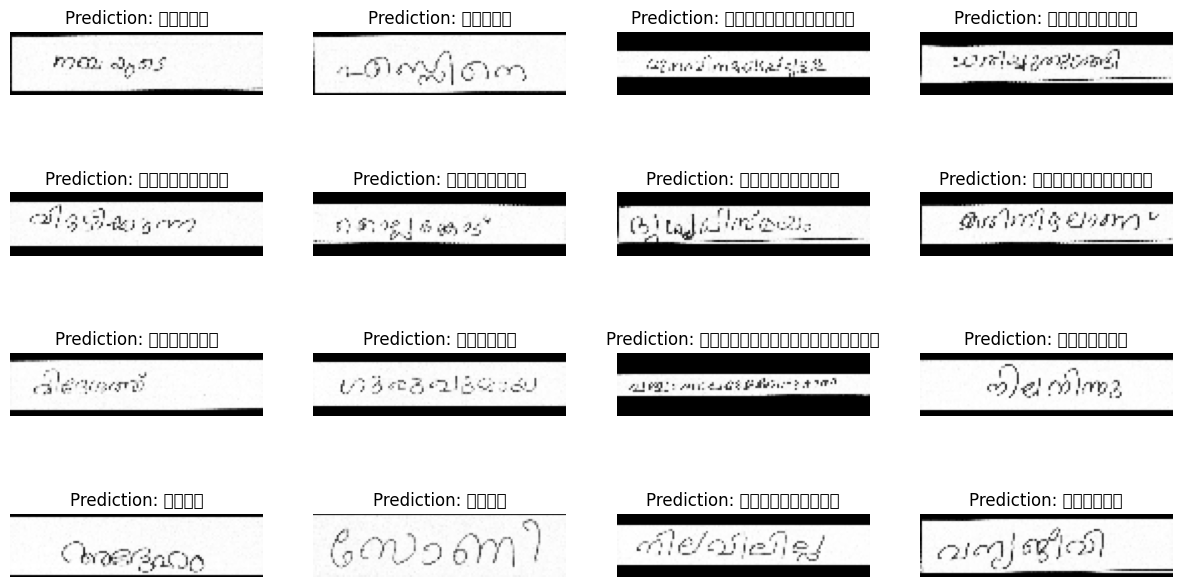

In [ ]:

# A utility function to decode the output of the network.
def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    # Use greedy search. For complex tasks, you can use beam search.
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][
        :, :max_len
    ]
    # Iterate over the results and get back the text.
    output_text = []
    for res in results:
        res = tf.gather(res, tf.where(tf.math.not_equal(res, -1)))
        res = tf.strings.reduce_join(num_to_char(res)).numpy().decode("utf-8")
        output_text.append(res)
    return output_text


#  Let's check results on some test samples.
for batch in test_ds.take(1):
    batch_images = batch["image"]
    _, ax = plt.subplots(4, 4, figsize=(15, 8))

    preds = prediction_model.predict(batch_images)
    pred_texts = decode_batch_predictions(preds)
    print(pred_texts)
    for i in range(16):
        img = batch_images[i]
        img = tf.image.flip_left_right(img)
        img = tf.transpose(img, perm=[1, 0, 2])
        img = (img * 255.0).numpy().clip(0, 255).astype(np.uint8)
        img = img[:, :, 0]

        title = f"Prediction: {pred_texts[i]}"
        ax[i // 4, i % 4].imshow(img, cmap="gray")
        ax[i // 4, i % 4].set_title(title)
        ax[i // 4, i % 4].axis("off")
        plt.rc('axes', unicode_minus=False)

plt.show()

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras

prediction_model.save('my_model_MA.h5')
prediction_model.save('my_model_MA.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import files

# Download the model file
files.download('my_model_MA.h5')
files.download('my_model_MA.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# import tensorflow as tf

# # Load the saved model
# model = tf.keras.models.load_model('my_model_MA.h5')

# # Assuming `new_data` is your new data for prediction

# model.summary()
# # Use the predictions for further processing


In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image
from tensorflow import keras

# Load the saved model
model = tf.keras.models.load_model('my_model_MA.keras')

def distortion_free_resize(image, img_size):
    w, h = img_size
    image = tf.image.resize(image, size=(h, w), preserve_aspect_ratio=True)

    # Check tha amount of padding needed to be done.
    pad_height = h - tf.shape(image)[0]
    pad_width = w - tf.shape(image)[1]

    # Only necessary if you want to do same amount of padding on both sides.
    if pad_height % 2 != 0:
        height = pad_height // 2
        pad_height_top = height + 1
        pad_height_bottom = height
    else:
        pad_height_top = pad_height_bottom = pad_height // 2

    if pad_width % 2 != 0:
        width = pad_width // 2
        pad_width_left = width + 1
        pad_width_right = width
    else:
        pad_width_left = pad_width_right = pad_width // 2

    image = tf.pad(
        image,
        paddings=[
            [pad_height_top, pad_height_bottom],
            [pad_width_left, pad_width_right],
            [0, 0],
        ],
    )

    image = tf.transpose(image, perm=[1, 0, 2])
    image = tf.image.flip_left_right(image)
    return image

def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    # Use greedy search. For complex tasks, you can use beam search.
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][:,:32]
    # Iterate over the results and get back the text.
    output_text = []
    for res in results:
        res = tf.gather(res, tf.where(tf.math.not_equal(res, -1)))
        res = tf.strings.reduce_join(num_to_char(res)).numpy().decode("utf-8")
        output_text.append(res)
    return output_text

# Load and preprocess the image
def preprocess_image(image_path, img_size=(128, 32)):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image)
    if len(image.shape) == 3 and image.shape[2] == 3:
        image = tf.image.rgb_to_grayscale(image)
    image = distortion_free_resize(image, (128, 32))
    image = tf.cast(image, tf.float32) / 255.0
    return image
# Assuming `image_path` is the path to your image
image_path = '/content/1.jpg'
img = preprocess_image(image_path)
img = np.expand_dims(img, axis=0)
#print(img)
# Make predictions
predictions = model.predict(img)
text = decode_batch_predictions(predictions)
print(text)

# Process the predictions as needed


NotFoundError: {{function_node __wrapped__ReadFile_device_/job:localhost/replica:0/task:0/device:CPU:0}} /content/1.jpg; No such file or directory [Op:ReadFile]